# 6.5 Unsupervised Machine Learning: Clustering

## 00. Table of Contents
1. Importing Libraries
2. Importing Data
3. Data Consistency Checks
4. Preparing Data for Clustering
5. K-Means Clustering
6. Cluster Analysis

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

## 02. Importing Data

In [2]:
path = r'C:\Users\kensz\OneDrive\Desktop\CF Data Analytics Course\Achievment 6\01-2023 NPS Analysis'

In [3]:
df_nps_noaa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'nps_noaa_merged.csv'))

## 03. Data Consistency Checks

In [4]:
df_nps_noaa.shape

(45960, 21)

In [5]:
df_nps_noaa.columns

Index(['Unnamed: 0', 'Data Grain', 'Park', 'Unit Code', 'Park Type', 'Region',
       'State', 'Year', 'Month', 'Recreation Visits', 'Non-Recreation Visits',
       'Recreation Hours', 'Non-Recreation Hours', 'Concessioner Lodging',
       'Concessioner Camping', 'Tent Campers', 'RV Campers',
       'Backcountry Campers', 'Non-Recreation Overnight Stays',
       'Misc. Overnight Stays', 'Monthly Avg Temp'],
      dtype='object')

In [6]:
df_nps_noaa = df_nps_noaa.drop(columns = ['Unnamed: 0'])

In [7]:
df_nps_noaa.columns

Index(['Data Grain', 'Park', 'Unit Code', 'Park Type', 'Region', 'State',
       'Year', 'Month', 'Recreation Visits', 'Non-Recreation Visits',
       'Recreation Hours', 'Non-Recreation Hours', 'Concessioner Lodging',
       'Concessioner Camping', 'Tent Campers', 'RV Campers',
       'Backcountry Campers', 'Non-Recreation Overnight Stays',
       'Misc. Overnight Stays', 'Monthly Avg Temp'],
      dtype='object')

In [8]:
df_nps_noaa.isnull().sum()

Data Grain                        0
Park                              0
Unit Code                         0
Park Type                         0
Region                            0
State                             0
Year                              0
Month                             0
Recreation Visits                 0
Non-Recreation Visits             0
Recreation Hours                  0
Non-Recreation Hours              0
Concessioner Lodging              0
Concessioner Camping              0
Tent Campers                      0
RV Campers                        0
Backcountry Campers               0
Non-Recreation Overnight Stays    0
Misc. Overnight Stays             0
Monthly Avg Temp                  0
dtype: int64

In [9]:
df_nps_noaa_dup = df_nps_noaa.duplicated()

In [10]:
df_nps_noaa_dup.shape

(45960,)

## 04. Preparing Data for Clustering

### Dropping Categorical Variables

In [11]:
df_cluster = df_nps_noaa.drop(columns = ['Data Grain', 'Park', 'Unit Code', 'Park Type', 'Region', 'State',])

In [12]:
df_cluster.head(25)

,Year,Month,Recreation Visits,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Monthly Avg Temp
0,2011,1,2643,0,2643,0,0,0,0,0,0,0,0,30.2
1,2011,1,39785,650766,50327,650766,0,0,0,0,63,0,0,30.2
2,2011,1,6889,11300,33275,11300,0,0,56,24,83,0,0,30.2
3,2011,2,3647,0,3647,0,0,0,0,0,0,0,0,39.1
4,2011,2,36010,488291,48136,488291,0,0,0,0,21,0,0,39.1
5,2011,2,7301,10852,38871,10852,160,0,132,64,110,0,0,39.1
6,2011,3,7925,0,7925,0,0,0,0,0,0,0,0,47.9
7,2011,3,69935,712075,117698,712075,0,0,92,304,142,0,75,47.9
8,2011,3,35195,9162,232146,9162,2138,0,1916,928,679,0,842,47.9
9,2011,4,19339,0,19339,0,0,0,0,0,0,0,0,58.8


In [13]:
df_cluster.shape

(45960, 14)

In [14]:
df_cluster = df_cluster[df_cluster['Recreation Visits']<1000000]

In [15]:
df_cluster.shape

(45662, 14)

### Elbow Test

In [16]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [17]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))]

score

[-4.890937156152174e+16,
 -1.9155670365723736e+16,
 -1.1812062561289832e+16,
 -8094712721782574.0,
 -5269649583432652.0,
 -3825081121881563.5,
 -2729210753137795.5,
 -2165704746961841.5,
 -1865346409439387.8]

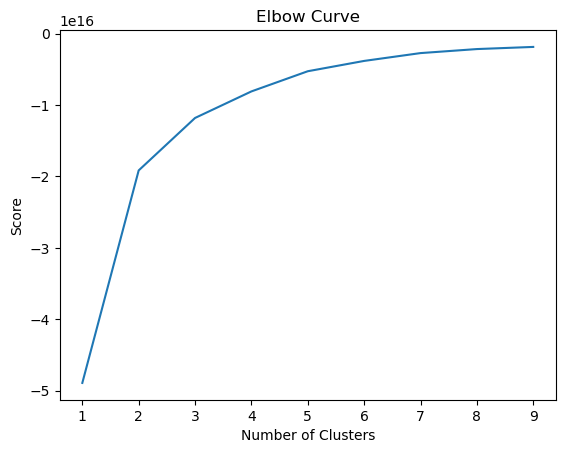

In [18]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

This elbow chart shows that after three clusters it starts to even out. Therefore, my k means will use three clusters.

## 05. K-Means Clustering

In [19]:
kmeans = KMeans(n_clusters = 3)

In [20]:
kmeans.fit(df_cluster)

KMeans(n_clusters=3)

In [21]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

In [22]:
df_cluster.head(25)

,Year,Month,Recreation Visits,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Monthly Avg Temp,clusters
0,2011,1,2643,0,2643,0,0,0,0,0,0,0,0,30.2,0
1,2011,1,39785,650766,50327,650766,0,0,0,0,63,0,0,30.2,0
2,2011,1,6889,11300,33275,11300,0,0,56,24,83,0,0,30.2,0
3,2011,2,3647,0,3647,0,0,0,0,0,0,0,0,39.1,0
4,2011,2,36010,488291,48136,488291,0,0,0,0,21,0,0,39.1,0
5,2011,2,7301,10852,38871,10852,160,0,132,64,110,0,0,39.1,0
6,2011,3,7925,0,7925,0,0,0,0,0,0,0,0,47.9,0
7,2011,3,69935,712075,117698,712075,0,0,92,304,142,0,75,47.9,0
8,2011,3,35195,9162,232146,9162,2138,0,1916,928,679,0,842,47.9,0
9,2011,4,19339,0,19339,0,0,0,0,0,0,0,0,58.8,0


In [23]:
df_cluster['clusters'].value_counts()

0    44177
1     1313
2      172
Name: clusters, dtype: int64

### Bi-Variate Analysis

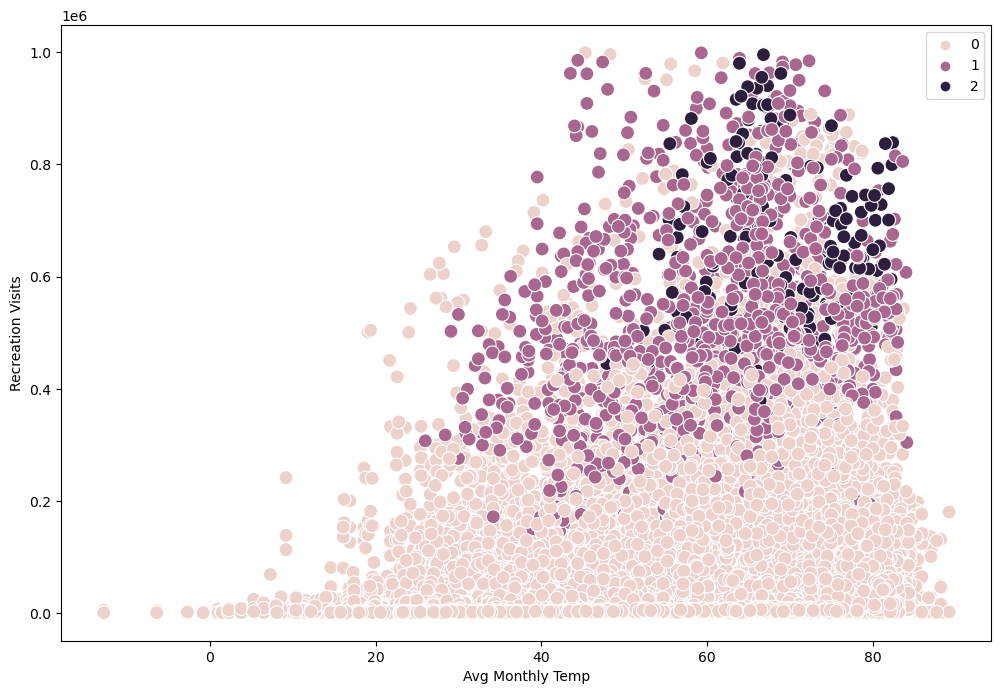

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Monthly Avg Temp'], y=df_cluster['Recreation Visits'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Avg Monthly Temp') # Label x-axis.
plt.ylabel('Recreation Visits') # Label y-axis.
plt.show()

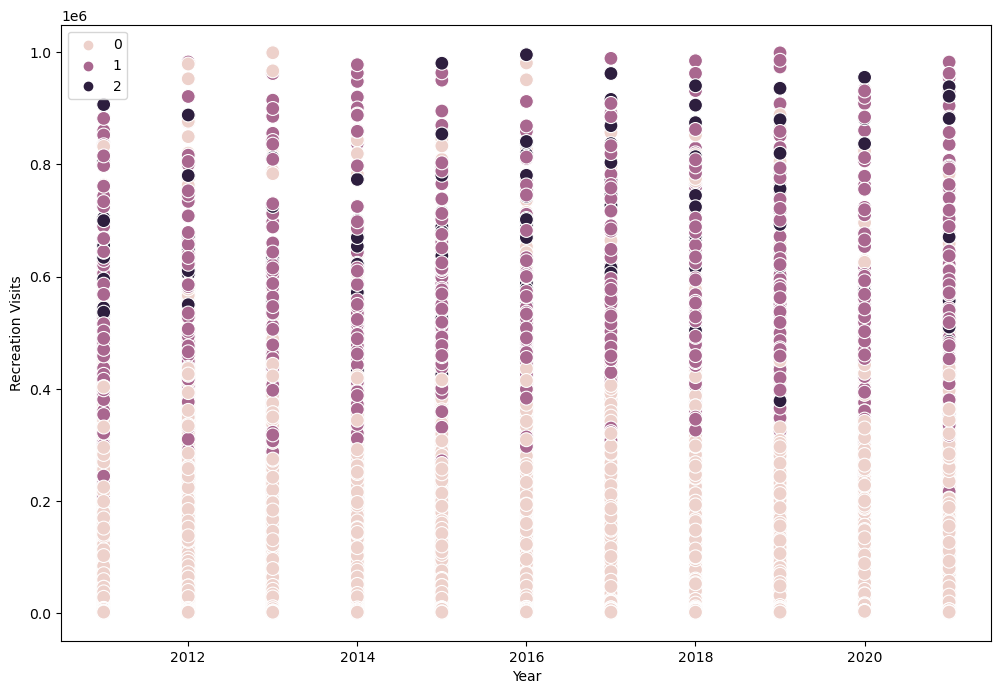

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Year'], y=df_cluster['Recreation Visits'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Recreation Visits') # Label y-axis.
plt.show()

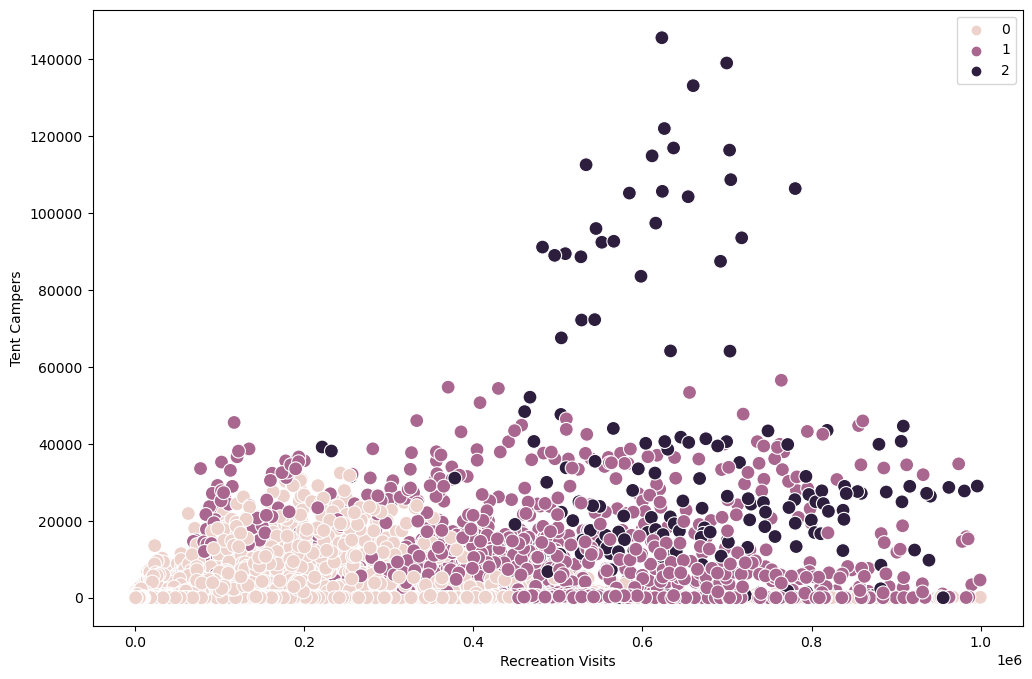

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Recreation Visits'], y=df_cluster['Tent Campers'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Recreation Visits') 
plt.ylabel('Tent Campers') 
plt.show()

The groupings in my clusters make sense. They are heavily weighted in favor of Recreation visits being a strong determining factor. Even after removing data points over 1,000,000 they are still the largest variable in any of the columns. Additionally, through the nature of the data they will need to be the largest. There can not be more camping visits than total visits. 

Additionally, some of the categorical values are what I'm really interested in examining. For example, park types and their locations. However, since those are categorical they cannot be examined in k-mean analysis. 

In [27]:
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'dark purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df_cluster.groupby('cluster').agg({'Recreation Visits':['mean', 'median'], 
                        'Non-Recreation Visits':['mean', 'median'], 
                        'Recreation Hours':['mean', 'median'],
                        'Non-Recreation Hours':['mean', 'median'],
                        'Concessioner Lodging':['mean','median'],
                        'Concessioner Camping':['mean','median'],
                        'Tent Campers':['mean','median'],
                        'RV Campers':['mean','median'],
                        'Backcountry Campers':['mean','median'],
                        'Non-Recreation Overnight Stays':['mean','median'],
                        'Misc. Overnight Stays':['mean','median'],
                        'Monthly Avg Temp':['mean','median']})

Recreation Visits           Non-Recreation Visits          \
                         mean    median                  mean  median   
cluster                                                                 
dark purple     649724.186047  633833.5          49390.000000  7600.5   
pink             39997.236005    9620.0          23858.659665     0.0   
purple          453808.408225  457309.0         128512.370906  8530.0   

            Recreation Hours             Non-Recreation Hours          \
                        mean      median                 mean  median   
cluster                                                                 
dark purple     1.142172e+07  10332728.0         49390.000000  7600.5   
pink            1.244721e+05     17281.0         23858.659665     0.0   
purple          3.588859e+06   3199187.0        128512.370906  8530.0   

            Concessioner Lodging           ...    RV Campers           \
                            mean   median  ...          mean   median   
cluster                                    ...                          
dark purple         74838.034884  75389.0  ...  17744.337209  12993.5   
pink                  151.890803      0.0  ...    268.854200      0.0   
purple               9290.531607   1406.0  ...   6120.372430   4528.0   

            Backcountry Campers          Non-Recreation Overnight Stays  \
                           mean   median                           mean   
cluster                                                                   
dark purple        22458.290698  14985.0                       0.000000   
pink                 188.809584      0.0                       8.950993   
purple              5949.706778   2588.0                     582.488195   

                   Misc. Overnight Stays         Monthly Avg Temp         
            median                  mean  median             mean median  
cluster                                                                   
dark purple    0.0          32757.040698  3894.5        69.465698   69.5  
pink           0.0            149.627634     0.0        53.900131   55.0  
purple         0.0           5368.113481   354.0        61.197487   63.2  

[3 rows x 24 columns]

### Key Takeaways from Clustering

1. Dark Purple is defined has high visitation in all categories, or top performing parks.
2. Purple is defined as having higher recreation visits, but purple has lower non-recreation visits.
3. Pink is defined as low visitation for both recreation and non-recreational purposes. 


In [30]:
df_cluster.head()

,Year,Month,Recreation Visits,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Monthly Avg Temp,clusters,cluster
0,2011,1,2643,0,2643,0,0,0,0,0,0,0,0,30.2,0,pink
1,2011,1,39785,650766,50327,650766,0,0,0,0,63,0,0,30.2,0,pink
2,2011,1,6889,11300,33275,11300,0,0,56,24,83,0,0,30.2,0,pink
3,2011,2,3647,0,3647,0,0,0,0,0,0,0,0,39.1,0,pink
4,2011,2,36010,488291,48136,488291,0,0,0,0,21,0,0,39.1,0,pink


In [31]:
df_nps_noaa.head()

,Data Grain,Park,Unit Code,Park Type,Region,State,Year,Month,Recreation Visits,Non-Recreation Visits,Recreation Hours,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Monthly Avg Temp
0,ABLI-2011-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,1,2643,0,2643,0,0,0,0,0,0,0,0,30.2
1,CUGA-2011-01,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,1,39785,650766,50327,650766,0,0,0,0,63,0,0,30.2
2,MACA-2011-01,Mammoth Cave NP,MACA,National Park,Southeast,KY,2011,1,6889,11300,33275,11300,0,0,56,24,83,0,0,30.2
3,ABLI-2011-02,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,2,3647,0,3647,0,0,0,0,0,0,0,0,39.1
4,CUGA-2011-02,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,2,36010,488291,48136,488291,0,0,0,0,21,0,0,39.1


In [32]:
df_nps_noaa['Cluster'] = df_cluster['cluster']

In [33]:
df_nps_noaa.head()

,Data Grain,Park,Unit Code,Park Type,Region,State,Year,Month,Recreation Visits,Non-Recreation Visits,...,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Monthly Avg Temp,Cluster
0,ABLI-2011-01,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,1,2643,0,...,0,0,0,0,0,0,0,0,30.2,pink
1,CUGA-2011-01,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,1,39785,650766,...,650766,0,0,0,0,63,0,0,30.2,pink
2,MACA-2011-01,Mammoth Cave NP,MACA,National Park,Southeast,KY,2011,1,6889,11300,...,11300,0,0,56,24,83,0,0,30.2,pink
3,ABLI-2011-02,Abraham Lincoln Birthplace NHP,ABLI,National Historical Park,Southeast,KY,2011,2,3647,0,...,0,0,0,0,0,0,0,0,39.1,pink
4,CUGA-2011-02,Cumberland Gap NHP,CUGA,National Historical Park,Southeast,KY,2011,2,36010,488291,...,488291,0,0,0,0,21,0,0,39.1,pink


In [34]:
df_nps_noaa.isnull().sum()

Data Grain                          0
Park                                0
Unit Code                           0
Park Type                           0
Region                              0
State                               0
Year                                0
Month                               0
Recreation Visits                   0
Non-Recreation Visits               0
Recreation Hours                    0
Non-Recreation Hours                0
Concessioner Lodging                0
Concessioner Camping                0
Tent Campers                        0
RV Campers                          0
Backcountry Campers                 0
Non-Recreation Overnight Stays      0
Misc. Overnight Stays               0
Monthly Avg Temp                    0
Cluster                           298
dtype: int64

In [35]:
df_nan = df_nps_noaa[df_nps_noaa['Cluster'].isnull() == True]

In [36]:
df_nan

,Data Grain,Park,Unit Code,Park Type,Region,State,Year,Month,Recreation Visits,Non-Recreation Visits,...,Non-Recreation Hours,Concessioner Lodging,Concessioner Camping,Tent Campers,RV Campers,Backcountry Campers,Non-Recreation Overnight Stays,Misc. Overnight Stays,Monthly Avg Temp,Cluster
766,CACO-2011-08,Cape Cod NS,CACO,National Seashore,Northeast,MA,2011,8,1025980,3214,...,3214,876,0,0,0,0,0,7323,69.8,NaN
1546,CACO-2016-08,Cape Cod NS,CACO,National Seashore,Northeast,MA,2016,8,1000526,3214,...,3214,869,0,0,0,0,0,4543,72.5,NaN
2538,GATE-2011-07,Gateway NRA,GATE,National Recreation Area,Northeast,NY,2011,7,1233876,96474,...,96474,0,0,0,0,0,0,1112,71.4,NaN
2558,GATE-2011-08,Gateway NRA,GATE,National Recreation Area,Northeast,NY,2011,8,1045901,105118,...,105118,0,0,0,0,0,0,963,67.6,NaN
3018,GATE-2013-07,Gateway NRA,GATE,National Recreation Area,Northeast,NY,2013,7,1069774,56370,...,56370,0,0,0,0,0,0,402,71.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31533,GOGA-2021-08,Golden Gate NRA,GOGA,National Recreation Area,Pacific West,CA,2021,8,1561906,0,...,0,3741,0,857,0,211,0,1091,77.0,NaN
31559,GOGA-2021-09,Golden Gate NRA,GOGA,National Recreation Area,Pacific West,CA,2021,9,1196694,0,...,0,3713,0,779,0,237,0,965,72.2,NaN
31585,GOGA-2021-10,Golden Gate NRA,GOGA,National Recreation Area,Pacific West,CA,2021,10,1193305,0,...,0,4026,0,695,0,246,0,1020,58.2,NaN
31611,GOGA-2021-11,Golden Gate NRA,GOGA,National Recreation Area,Pacific West,CA,2021,11,1049628,0,...,0,3950,0,581,0,211,0,1030,54.8,NaN


In [37]:
df_nan['Park'].value_counts()

Golden Gate NRA               119
Blue Ridge PKWY                86
Great Smoky Mountains NP       58
Gateway NRA                    22
George Washington MEM PKWY      8
Cape Cod NS                     2
Stonewall NM                    1
Glacier NP                      1
Yellowstone NP                  1
Name: Park, dtype: int64

In [38]:
df_nps_noaa['Cluster'].fillna('dark purple', inplace=True)

In [39]:
df_nps_noaa.isnull().sum()

Data Grain                        0
Park                              0
Unit Code                         0
Park Type                         0
Region                            0
State                             0
Year                              0
Month                             0
Recreation Visits                 0
Non-Recreation Visits             0
Recreation Hours                  0
Non-Recreation Hours              0
Concessioner Lodging              0
Concessioner Camping              0
Tent Campers                      0
RV Campers                        0
Backcountry Campers               0
Non-Recreation Overnight Stays    0
Misc. Overnight Stays             0
Monthly Avg Temp                  0
Cluster                           0
dtype: int64

In [40]:
df_nps_noaa.to_csv(os.path.join(path, '02 Data', 'Prepared', 'NPS Cluster Analysis.csv'))